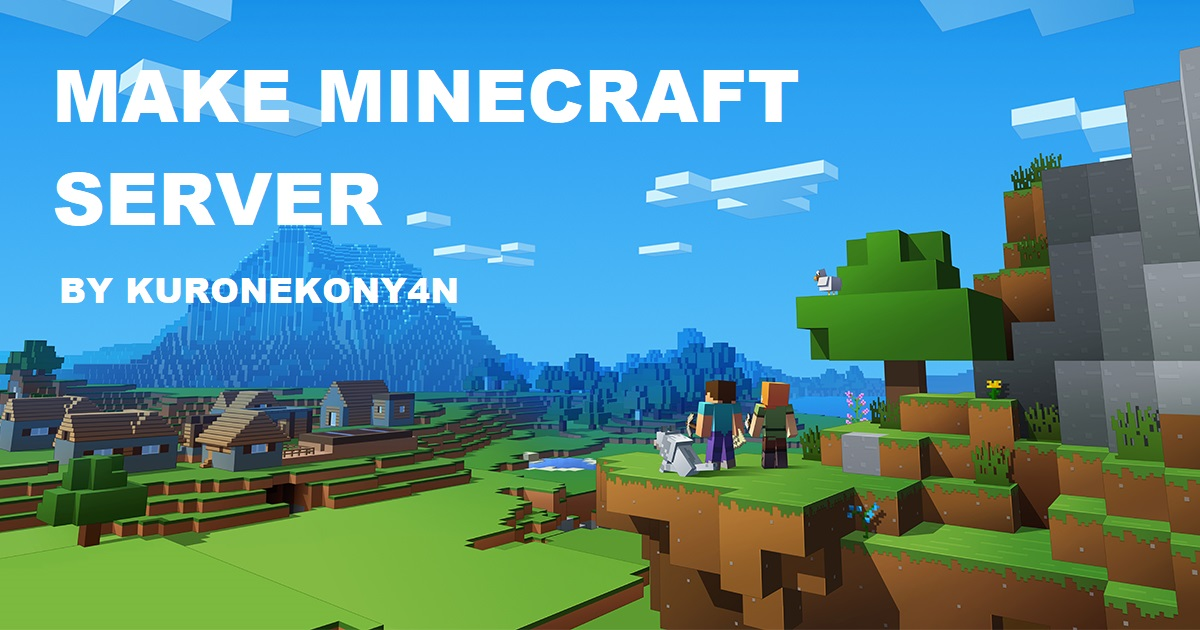

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **MAKE MINECRAFT JAVA SERVER**
### by [kuronekony4n](https://facebook.com/addstring)
---

### (TUTORIAL 1) First time here?
1. Connect to Collab Runtime.
Click on **Connect** button on top right corner (below Comment and Share button). Wait until you succesfully Connected.
2. Mount your Drive Account. 
Click the "**Files**" tab on the left side of screen then click on **Google Drive Icon** to Connect.
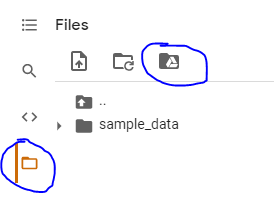
3. [Prepare the machine](#scrollTo=8VdguV4hU3lg).
Run cell "Prepare the machine". It will make new folder called "**MinecraftServer**" on your Drive root folder for all the server files we will going to saved to.
(If you already have folder on your drive called "**MinecraftServer**", this step is optional.)

---
### (TUTORIAL 2) Make new Server
Make sure you already does everything on **TUTORIAL 1** before proceeding.
1. Input your worldname. 
This will make new folder for that server and save all the server files in it.
2. Input your desire paper url.
Visit [this pages](https://papermc.io/downloads) to find paper releases you want to use. Just copy and paste the download URL on the **paper_url** form.
3. [Run the cell](#scrollTo=c6uGz_H4S9pD)

---
### (TUTORIAL 3) Run your server
Make sure you already does everything on TUTORIAL 2 before proceeding.
1. Input worldname you want to run the server.
2. Visit [ngrok website](https://ngrok.com), login or make new account if you don't have. After logged in, open [this page](https://dashboard.ngrok.com/auth/your-authtoken) and copy paste your Authtoken to **ngrok_authtoken** form.
3. [Run the cell](#scrollTo=uxupUewRYjWB)
4. Wait until you see server log like this and your server is online.
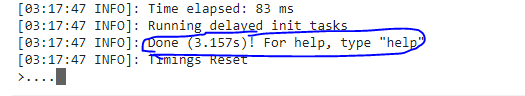

---
### (TUTORIAL 4) Connect to your server
Make sure your server is online.
1. Open your Minecraft Java Game with the same version with your paper release, click on Multiplayer and add new Server.
2. Open [ngrok tunnel list](https://dashboard.ngrok.com/status/tunnels).
3. Locate your tunnel and copy paste the URL to your Minecraft game server address. (without **tcp://**)
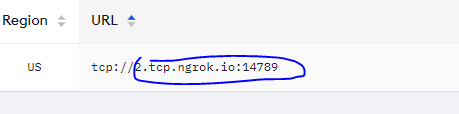
4. Connect to your server.
---


# **RUNTIME**

In [ ]:
#@title Prepare the machine
#@markdown Run this if this is your first time ever.

%mkdir "/content/drive/My Drive/MinecraftServer"
print("Preparing complete.")

In [ ]:
#@title Make new Minecraft Server
world_name = 'your world name' #@param {type:"string"}
#install_ngrok = False #@param {type:"boolean"}
#ngrok_url = 'https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip' #@param {type:"string"}
#install_paper = False #@param {type:"boolean"}
paper_url = 'https://papermc.io/api/v1/paper/1.16.4/261/download' #@param {type:"string"}

from IPython.display import clear_output

print("Initializing..")
%cd "/content/drive/My Drive/MinecraftServer"
%mkdir "$world_name"
%cd "$world_name"
clear_output()

print(f'\33[34m'+'Preparing NGROK'+'\33[0m')
!curl -o ngrok.zip 'https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip'
!unzip ngrok.zip
!chmod +x ./ngrok

print(f'\33[34m'+'Preparing PAPER'+'\33[0m')
!curl -o paper.jar "$paper_url"

clear_output()
print(f'\33[34m'+'Completed.'+'\33[0m')

In [ ]:
#@title Run Minecraft Server
world_name = 'your world name' #@param {type:"string"}
ngrok_authtoken = 'ngrok authtoken' #@param {type: "string"}
server_region = "united_states" #@param ["united_states", "europe", "asia_pacific", "australia", "south_america", "japan", "india"]

%cd "/content/drive/My Drive/MinecraftServer"
%cd "$world_name"
from IPython.display import clear_output
clear_output()
print(f'\33[34m'+'Connecting to your NGROK account..'+'\33[0m')
!chmod +x ./ngrok
!./ngrok authtoken $ngrok_authtoken
if server_region == "united_states":
    !./ngrok tcp 25565 --region=us > /dev/null 2>&1 &
elif server_region == "europe":
    !./ngrok tcp 25565 --region=eu > /dev/null 2>&1 &
elif server_region == "asia_pacific":
    !./ngrok tcp 25565 --region=ap > /dev/null 2>&1 &
elif server_region == "australia":
    !./ngrok tcp 25565 --region=au > /dev/null 2>&1 &
elif server_region == "south_america":
    !./ngrok tcp 25565 --region=sa > /dev/null 2>&1 &
elif server_region == "japan":
    !./ngrok tcp 25565 --region=jp > /dev/null 2>&1 &
elif server_region == "india":
    !./ngrok tcp 25565 --region=in > /dev/null 2>&1 &


!java -jar paper.jar

In [ ]:
#@title Delete existing Minecraft Server
world_name = 'your world name' #@param {type:"string"}
#@markdown Becareful. This will delete your minecraft world server folder permamently. (CAN'T BE RECOVERED)
%cd "/content/drive/My Drive/MinecraftServer"
%rm -r "$world_name"

print(f'\33[34m'+'Action completed.'+'\33[0m')

In [ ]:
#@title Duplicate world server
from subprocess import call
world_name = 'existing world name' #@param {type:"string"}
world_name_new = 'new world name' #@param {type:"string"}

def cp_dir(source, target):
    call(['cp', '-a', source, target]) 

%cd "/content/drive/My Drive/MinecraftServer"
print('\33[34m'+'Copying..'+'\33[0m')
cp_dir(world_name, world_name_new)

print('\33[34m'+'Copy Complete, but make sure your file is safely copied..'+'\33[0m')

# **HELP AND TROUBLESHOOT**

1. SERVER EULA. If you find log like this, Open directory to **MinecraftServer/world_name/** and find file **eula.txt**, double click the file  will open the text editor and change **eula value** from **false** to **true** and type **CTRL+S** to save the txt file. Try to run the server again.
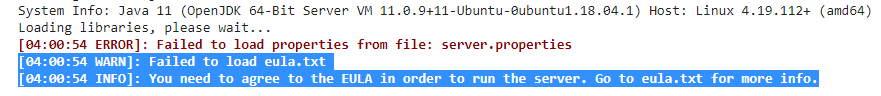
2. How to edit server propeties? Navigate to your **world_name** directory and find **server.properties** file. Right-click on it and click on **RENAME**. Rename **server.properties** to **server.txt** and click enter to confirm, after that double click the file will open the text editor and change any value you want to edit. If you done type **CTRL+S** to save the changes and Rename the file back to **server.properties**. And try to Run your server again.
3. How to delete a world? Go to [this cell](#scrollTo=GT-bBHykhtXg), input your **world_name** and run the cell.
4. How to close or terminate a server? If you want to stop a server, you have to stop the running cell. See this screenshot. Click only once and see the logs. 
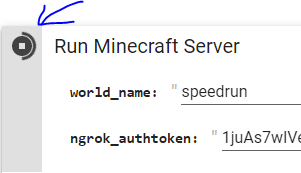
5. How to input server commands. On server running logs, click on the text bar and start type the server commands without **/**. For example see screenshot. **1** for you to input the command. **2** to see the command. [Minecraft Server Command List](https://wiki.nitrado.net/en/Server_commands_of_Minecraft).
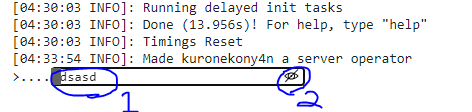
6. [Contact me on facebook](https://facebook.com/addstring) or make an issue in [github](https://github.com/kuronekony4n/minecraftServerMake/issues) if you have other problem.